In [149]:
import pandas as pd
import numpy as np
import os
import cv2
import random
import seaborn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
DIR=r'C:\Users\John Joel\Projects\Cats vs dogs\dogscats\train'
CATEGORIES=['cats','dogs']

In [64]:
data=[]
for category in CATEGORIES:
    path=os.path.join(DIR,category) #Joining DIR with cat and dog subfolders
    label=CATEGORIES.index(category)
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        img_r=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img_resized=cv2.resize(img_r,(60,60))
        data.append([img_resized,label]) #appending both the image and its corresponding label
     
    

In [65]:
data[0]

[array([[170, 177, 183, ..., 217, 211, 206],
        [171, 177, 183, ..., 218, 216, 209],
        [170, 177, 183, ..., 218, 216, 212],
        ...,
        [131, 135, 137, ...,   2,   3,   3],
        [128, 132, 134, ...,   3,   3,   3],
        [125, 130, 133, ...,   2,   2,   2]], dtype=uint8),
 0]

In [66]:
data[20000]

[array([[ 68,  78,  75, ...,  71,  86,  82],
        [ 53,  62,  75, ...,  58,  92,  95],
        [ 68,  91,  83, ...,  59,  67,  80],
        ...,
        [117, 114, 125, ..., 133, 126, 126],
        [127, 137, 120, ..., 143, 130, 127],
        [103, 114,  78, ..., 132, 129, 125]], dtype=uint8),
 1]

In [67]:
len(img_resized)

60

In [68]:
random.shuffle(data)

In [69]:
X=[]
Y=[]
for features,labels in data:
    X.append(features)
    Y.append(labels) 

In [70]:
X=np.array(X)
Y=np.array(Y)

In [71]:
X.shape,Y.shape

((23000, 60, 60), (23000,))

In [72]:
X[0]

array([[ 31,  35,  49, ..., 102, 126, 131],
       [133,  55, 150, ...,  85, 177,  97],
       [155, 101, 145, ..., 111, 157,  45],
       ...,
       [106, 106, 113, ..., 166, 160, 160],
       [ 79, 120,  68, ..., 179, 185, 165],
       [ 86,  76,  40, ..., 186, 192, 154]], dtype=uint8)

In [73]:
Y[0]

0

In [74]:
X=X/255 #Normalising

In [75]:
X

array([[[0.12156863, 0.1372549 , 0.19215686, ..., 0.4       ,
         0.49411765, 0.51372549],
        [0.52156863, 0.21568627, 0.58823529, ..., 0.33333333,
         0.69411765, 0.38039216],
        [0.60784314, 0.39607843, 0.56862745, ..., 0.43529412,
         0.61568627, 0.17647059],
        ...,
        [0.41568627, 0.41568627, 0.44313725, ..., 0.65098039,
         0.62745098, 0.62745098],
        [0.30980392, 0.47058824, 0.26666667, ..., 0.70196078,
         0.7254902 , 0.64705882],
        [0.3372549 , 0.29803922, 0.15686275, ..., 0.72941176,
         0.75294118, 0.60392157]],

       [[0.35686275, 0.34509804, 0.80784314, ..., 0.9254902 ,
         0.9254902 , 0.91764706],
        [0.37647059, 0.36862745, 0.82352941, ..., 0.9372549 ,
         0.9372549 , 0.92941176],
        [0.32156863, 0.22745098, 0.89803922, ..., 0.92941176,
         0.94509804, 0.93333333],
        ...,
        [0.42745098, 0.10196078, 0.5254902 , ..., 1.        ,
         1.        , 1.        ],
        [0.7

In [76]:
Y

array([0, 0, 1, ..., 1, 1, 1])

In [91]:
X.shape

(23000, 60, 60, 1)

In [79]:
X = X.reshape(-1, 60, 60, 1)
X.shape

(23000, 60, 60, 1)

In [92]:
Y.shape

(23000,)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D

In [115]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=X.shape[1:],activation='relu')) #Hidden layer
model.add(Dense(2,activation='softmax')) # o/p layer

In [116]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [118]:
model.fit(X, Y, epochs=10, validation_split=0.1)

Epoch 1/10
647/647 [==============================] - 60s 92ms/step - loss: 0.4445 - accuracy: 0.7909 - val_loss: 0.4761 - val_accuracy: 0.7765
Epoch 2/10
647/647 [==============================] - 57s 88ms/step - loss: 0.3793 - accuracy: 0.8293 - val_loss: 0.4732 - val_accuracy: 0.7774
Epoch 3/10
647/647 [==============================] - 61s 95ms/step - loss: 0.2979 - accuracy: 0.8711 - val_loss: 0.4991 - val_accuracy: 0.7848
Epoch 4/10
647/647 [==============================] - 58s 90ms/step - loss: 0.2020 - accuracy: 0.9174 - val_loss: 0.5641 - val_accuracy: 0.7913
Epoch 5/10
647/647 [==============================] - 59s 91ms/step - loss: 0.1122 - accuracy: 0.9601 - val_loss: 0.6974 - val_accuracy: 0.7822
Epoch 6/10
647/647 [==============================] - 58s 90ms/step - loss: 0.0576 - accuracy: 0.9829 - val_loss: 0.8439 - val_accuracy: 0.7722
Epoch 7/10
647/647 [==============================] - 61s 95ms/step - loss: 0.0342 - accuracy: 0.9906 - val_loss: 0.9818 - val_accuracy:

### Training is done. 
### Now let's test our model with a new image

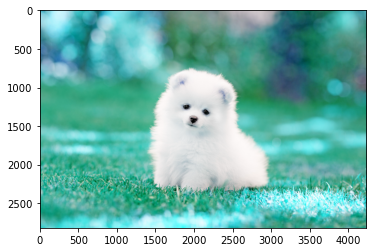

In [133]:
test_=cv2.imread('d.jpg')
plt.imshow(test_)

In [128]:
def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (60, 60))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 60, 60, 1)
    return new_arr
lets_test=image('d.jpg')

In [130]:
prediction=model.predict(lets_test)
print(CATEGORIES[prediction.argmax()])

dogs


### Our model predicted that it is a dog